# Introducción (5 min)

**Google Play Store** es una tienda de aplicaciones en línea operada por Google para dispositivos Android. Ofrece una amplia gama de aplicaciones, juegos, libros, películas, series y música para descargar o comprar. Los usuarios pueden buscar y descargar aplicaciones a través de la tienda, y los desarrolladores pueden publicar y vender sus aplicaciones a través de ella. La Google Play Store también ofrece funciones de seguridad para proteger a los usuarios contra aplicaciones maliciosas. En general, la Google Play Store es una plataforma esencial para los usuarios de dispositivos Android que desean descargar y utilizar aplicaciones en sus dispositivos.

**Contexto empresarial**: Soy un científico de datos trabajando en un proyecto de freelance para una empresa que requiere cierta información acerca de apps que se ofertan en la tienda de aplicaciones de Google (Playstore), esto con el motivo de generar hallazgos tales como que tipo de aplicaciones tienen mayor número de descargas, mejores calificaciones, mayor número de reseñas, todo esto con la hipotesis que la empresa debería lanzar una app sobre educación ya que ven potencial en ese nicho

**Problema Empresarial**: De parte del departamento de marketing se me ha planteado la siguiente pregunta: **¿Es realmente la categoría de educación la que mayor impacto tiene en la Google Playstore?**

**Contexto Analítico**: Google ha dejado este Dataset abierto al público general bajo una licencia Creavtive Commons con el fin de que se usen sus datos para un bien común.

El dataset incluye datos tales como Califiaciones, número de revisiones, género de las apps, su número de descargas. A continuación se resolverá la pregunta planteada anteriormente por el equipo de marketing así como se averiguará mayor información descrita posteriormente

El caso está estructurado de la siguiente manera: (1) Se realizará un análisis general de los datos para encontrar tendencias evidentes, (2) se indagará con mayor profundidad eventos relevantes de las tendencias generales, (3) Se responderá la pregunta planteada anteriormente así como se complementará la respuesta para soluciones alternativas o dar un enfoque completamente nuevo

Primero se importan las librerias

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

Previsualización del dataset para ver que columnas y tipos de datos contiene

In [28]:
playstore = pd.read_csv('/workspaces/codespaces-jupyter/data/googleplaystore.csv')

playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Imprimo unicamente las categorias para tener una idea de cuales son

In [29]:
categorias_series = playstore['Category'].value_counts()
categorias_df = categorias_series.to_frame()
categorias = np.array([categorias_df.index[:]])

flat_categorias = categorias.flatten() #Ya que el array estaba en 2d y al momento de plotear no las leía
print(flat_categorias)

['FAMILY' 'GAME' 'TOOLS' 'MEDICAL' 'BUSINESS' 'PRODUCTIVITY'
 'PERSONALIZATION' 'COMMUNICATION' 'SPORTS' 'LIFESTYLE' 'FINANCE'
 'HEALTH_AND_FITNESS' 'PHOTOGRAPHY' 'SOCIAL' 'NEWS_AND_MAGAZINES'
 'SHOPPING' 'TRAVEL_AND_LOCAL' 'DATING' 'BOOKS_AND_REFERENCE'
 'VIDEO_PLAYERS' 'EDUCATION' 'ENTERTAINMENT' 'MAPS_AND_NAVIGATION'
 'FOOD_AND_DRINK' 'HOUSE_AND_HOME' 'LIBRARIES_AND_DEMO'
 'AUTO_AND_VEHICLES' 'WEATHER' 'ART_AND_DESIGN' 'EVENTS' 'PARENTING'
 'COMICS' 'BEAUTY' '1.9']


([<matplotlib.patches.Wedge at 0x7f6712b76c50>,
 [Text(0.9252221873833926, 0.5949486565860037, 'FAMILY'),
  Text(0.1058260748886533, 1.0948976399068826, 'GAME'),
  Text(-0.5074246628505927, 0.9759714194232136, 'TOOLS'),
  Text(-0.8321305295764472, 0.7194155834751021, 'MEDICAL'),
  Text(-0.9926802140046957, 0.473905046104799, 'BUSINESS'),
  Text(-1.0803639656025608, 0.20691472114740644, 'PRODUCTIVITY'),
  Text(-1.0987730743935082, -0.05193968605833206, 'PERSONALIZATION'),
  Text(-1.059268820248014, -0.2965629215704157, 'COMMUNICATION'),
  Text(-0.9672294132049182, -0.5238962323125352, 'SPORTS'),
  Text(-0.8281568492295444, -0.7239863486794443, 'LIFESTYLE'),
  Text(-0.653070894775182, -0.8851544534133822, 'FINANCE'),
  Text(-0.4593276205265955, -0.9995089479446275, 'HEALTH_AND_FITNESS'),
  Text(-0.25599166750050095, -1.069798236197047, 'PHOTOGRAPHY'),
  Text(-0.05751117552547891, -1.098495546049085, 'SOCIAL'),
  Text(0.12642982473992392, -1.0927101625848605, 'NEWS_AND_MAGAZINES'),
  Text

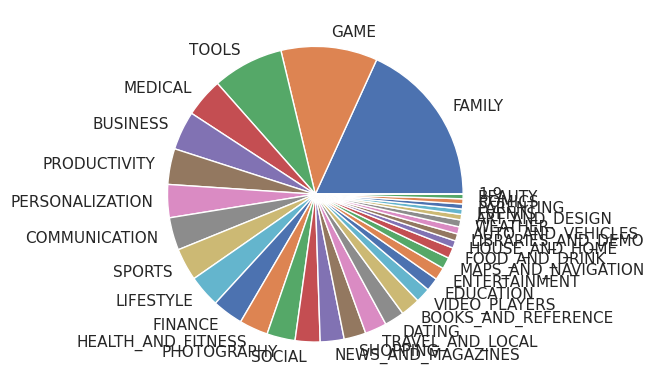

In [30]:
plt.pie(playstore['Category'].value_counts(), labels=flat_categorias)

Se puede observar que La categoria de familia es mucho mayor a cualquier otra en la playstore, mientras que educación ni siquiera alcanza a estar en el top 10

In [31]:
family = playstore[playstore['Category'] == 'FAMILY']
family_genres = family['Genres'].value_counts()
df_family_genres = family_genres.to_frame()
fam_gen = np.array([df_family_genres.index[:]])

flat_gen_fam = fam_gen.flatten() #Ya que el array estaba en 2d y al momento de plotear no las leía
print(flat_gen_fam)

['Entertainment' 'Education' 'Simulation' 'Casual' 'Puzzle' 'Role Playing'
 'Strategy' 'Educational;Education' 'Educational' 'Education;Education'
 'Casual;Pretend Play' 'Racing;Action & Adventure'
 'Casual;Action & Adventure' 'Puzzle;Brain Games' 'Education;Pretend Play'
 'Educational;Pretend Play' 'Entertainment;Music & Video'
 'Arcade;Action & Adventure' 'Board;Brain Games'
 'Action;Action & Adventure' 'Casual;Brain Games'
 'Simulation;Action & Adventure' 'Adventure;Action & Adventure'
 'Role Playing;Action & Adventure' 'Entertainment;Brain Games'
 'Educational;Brain Games' 'Casual;Creativity' 'Educational;Creativity'
 'Role Playing;Pretend Play' 'Puzzle;Action & Adventure'
 'Education;Action & Adventure' 'Simulation;Pretend Play'
 'Education;Creativity' 'Sports;Action & Adventure'
 'Educational;Action & Adventure' 'Education;Music & Video'
 'Board;Action & Adventure' 'Entertainment;Action & Adventure'
 'Casual;Education' 'Music;Music & Video' 'Adventure;Education'
 'Education;Brain

([<matplotlib.patches.Wedge at 0x7f6712c53010>,
 [Text(0.78521665102978, 0.7703472015562702, 'Entertainment'),
  Text(-0.665691655090025, 0.8757023583064644, 'Education'),
  Text(-1.0986588284983219, -0.054302657050046756, 'Simulation'),
  Text(-0.9163167647123377, -0.6085750460765825, 'Casual'),
  Text(-0.6144016919472962, -0.9124201668816291, 'Puzzle'),
  Text(-0.3128088578930704, -1.054585519729734, 'Role Playing'),
  Text(-0.008761900696216152, -1.0999651035811044, 'Strategy'),
  Text(0.20728990923608662, -1.0802920408523313, 'Educational;Education'),
  Text(0.33958539852920405, -1.046270403435824, 'Educational'),
  Text(0.4571014725030525, -1.0005289820067889, 'Education;Education'),
  Text(0.5580741317481409, -0.9479204942786915, 'Casual;Pretend Play'),
  Text(0.6317313745930568, -0.9005084510179608, 'Racing;Action & Adventure'),
  Text(0.6877943219267865, -0.858451495848934, 'Casual;Action & Adventure'),
  Text(0.7397692688506338, -0.8140893248681, 'Puzzle;Brain Games'),
  Text(

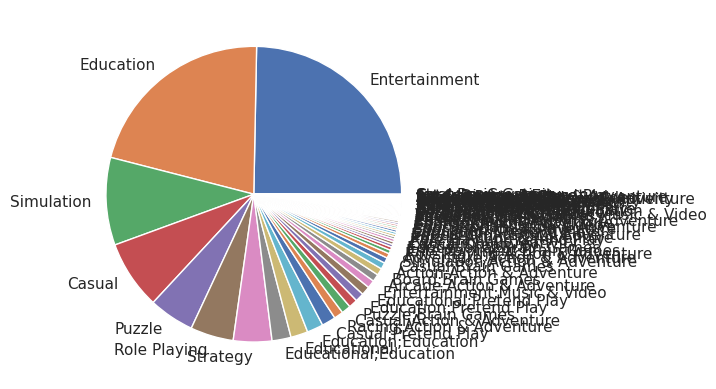

In [32]:
family_genres_plot = family['Genres']

plt.pie(family_genres_plot.value_counts(), labels=flat_gen_fam)

Ya que familia ocupa gran parte de la playstore se puede observar que entretenimiento, educación y simulación son las categorias de apps dentro del género de familia que más apps tienen

In [33]:
gratis = len(playstore[playstore['Type'] == 'Free'])
de_pago = len(playstore[playstore['Type'] == 'Paid'])

print('Hay ' + str(gratis) + ' apps gratis')
print('Hay ' + str(de_pago) + ' apps de pago')

Hay 10039 apps gratis
Hay 800 apps de pago


<function matplotlib.pyplot.show(close=None, block=None)>

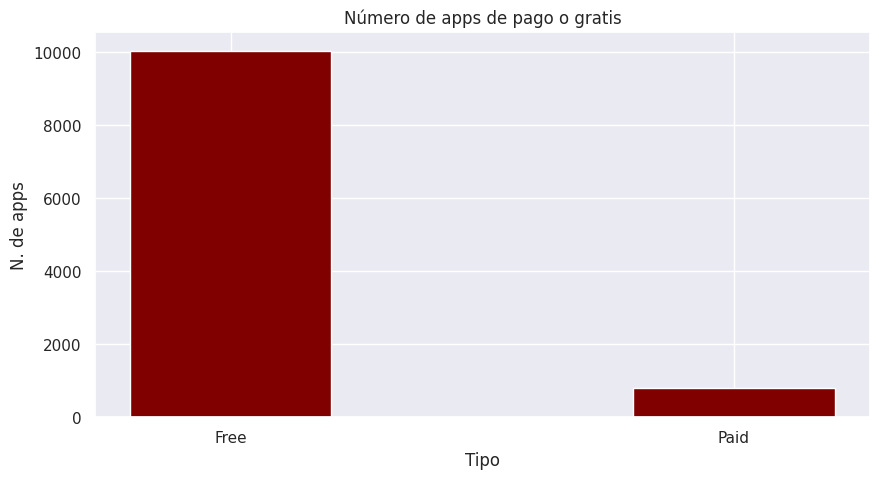

In [34]:
data = {'Free':gratis, 'Paid':de_pago}
labels = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(10, 5))

plt.bar(labels, values, color = 'maroon', width = 0.4)

plt.xlabel('Tipo')
plt.ylabel('N. de apps')
plt.title('Número de apps de pago o gratis')
plt.show

Se observa que la mayoría de apps son gratis en la playstore

In [35]:
top_100 = playstore[playstore['App'] == '1800 Contacts - Lens Store']
top_100

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up


In [36]:
game = playstore[playstore['Category'] == 'GAME'].sort_values('Rating', ascending=False)
game_resume = game[['App', 'Rating', 'Reviews', 'Installs']]
game_resume_top = game_resume.loc[game_resume['Rating'] > 4]
game_resume_top.head()

,App,Rating,Reviews,Installs
7698,CP Trivia,5.0,5,100+
5917,Ra Ga Ba,5.0,2,1+
9056,Santa's Monster Shootout DX,5.0,4,50+
5795,Axe Champs! Wars,5.0,8,50+
6700,Brick Breaker BR,5.0,7,5+


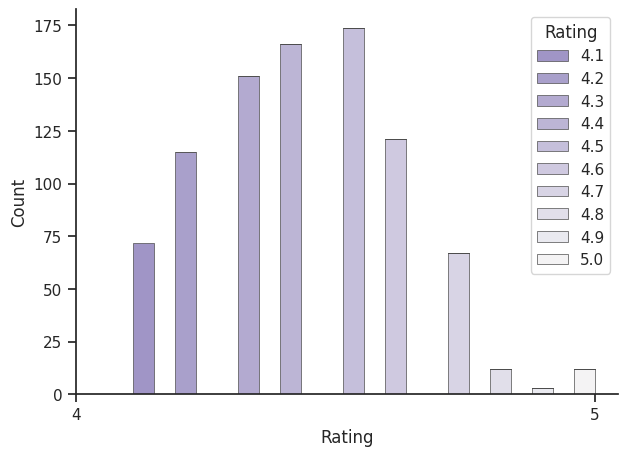

In [37]:
sns.set_theme(style = 'ticks')
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    game_resume_top,
     x = 'Rating',
     hue = 'Rating',
     multiple = "stack",
     palette = "light:m_r",
     edgecolor = ".3",
     linewidth = .5,
     log_scale = True
     )
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([4, 5])

In [38]:
game.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7698,CP Trivia,GAME,5.0,5,12M,100+,Free,0,Everyone,Trivia,"August 6, 2018",0.99,5.0 and up
5917,Ra Ga Ba,GAME,5.0,2,20M,1+,Paid,$1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
9056,Santa's Monster Shootout DX,GAME,5.0,4,33M,50+,Paid,$1.99,Teen,Action,"August 15, 2013",1.05,2.2 and up
5795,Axe Champs! Wars,GAME,5.0,8,25M,50+,Free,0,Everyone,Arcade,"June 26, 2018",1.1,4.1 and up
6700,Brick Breaker BR,GAME,5.0,7,19M,5+,Free,0,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up


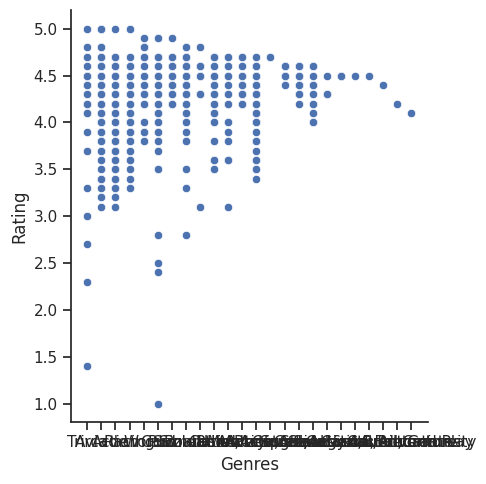

In [39]:
sns.relplot(data=game, x="Genres", y="Rating")

In [40]:
education = playstore[playstore['Category'] == 'EDUCATION']
education.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
699,Duolingo: Learn Languages Free,EDUCATION,4.7,6289924,Varies with device,"100,000,000+",Free,0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device
700,TED,EDUCATION,4.6,181893,18M,"10,000,000+",Free,0,Everyone 10+,Education,"July 27, 2018",3.2.5,4.1 and up
701,English Communication - Learn English for Chin...,EDUCATION,4.7,2544,18M,"100,000+",Free,0,Everyone,Education,"December 29, 2017",3.1,4.0 and up
702,Khan Academy,EDUCATION,4.6,85375,21M,"5,000,000+",Free,0,Everyone,Education,"July 27, 2018",5.0.0,4.1 and up
703,Learn English with Wlingua,EDUCATION,4.7,314299,3.3M,"10,000,000+",Free,0,Everyone,Education,"May 2, 2018",1.94.9,4.0 and up


TypeError: loop of ufunc does not support argument 1 of type str which has no callable conjugate method

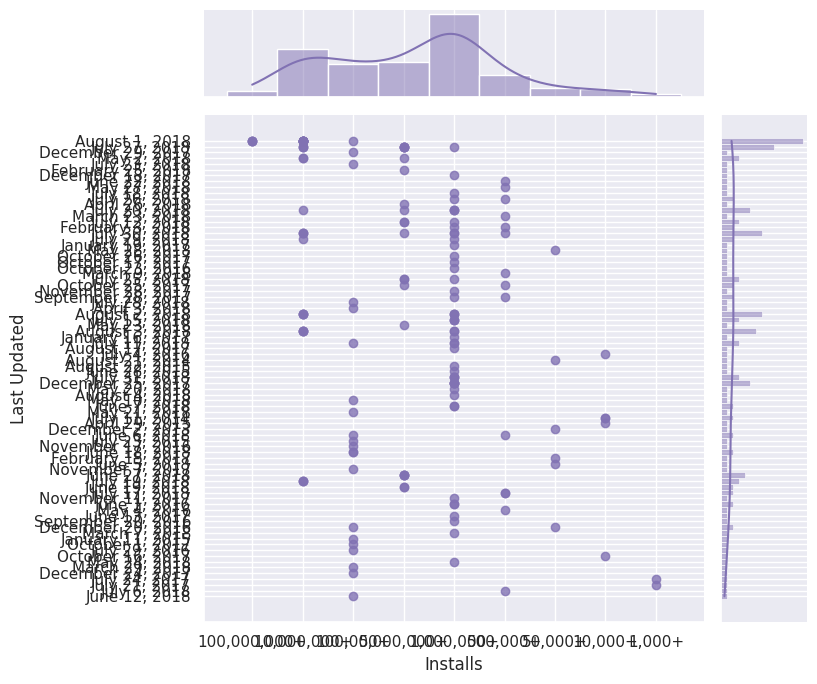

In [41]:
import seaborn as sns
sns.set_theme(style="darkgrid")
g = sns.jointplot(x='Installs', y="Last Updated", data=education,
                  kind="reg", truncate=False,
                  color="m", height=7)